In [6]:
#Usar Python 2
from __future__ import division
import random
import math

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz as w
from scipy.optimize import curve_fit


#Se define la función de costo para utilizar en el proceso de optimización

def f_clx(x,f0,f1,f2,f3,f4,f5,
          G0,G1,G2,G3,G4,G5,
          wo1,wo2,wo3,wo4,wo5):   #wo: eV


    
    epsilon = 1
    
    epsilon += (-1)*f0/(x**2+ 1j*G0*x) #χ1

    epsilon += f1/((wo1**2-x**2)- (1j*G1*x)) #χ1
                   
    epsilon += f2/((wo2**2-x**2)- (1j*G2*x)) #χ1
                   
    epsilon += f3/((wo3**2-x**2)- (1j*G3*x)) #χ1
                   
    epsilon += f4/((wo4**2-x**2)- (1j*G4*x)) #χ1
                   
    epsilon += f5/((wo5**2-x**2)- (1j*G5*x)) #χ1
    

                   

        
    n=(np.sqrt(epsilon)).real
    k=(np.sqrt(epsilon)).imag
   
    return np.hstack([n, k])

def func2(x,f0,f1,f2,f3,f4,f5,
          G0,G1,G2,G3,G4,G5,
          wo1,wo2,wo3,wo4,wo5):  
   
    epsilon = 1
    
    epsilon += (-1)*f0/(x**2+ 1j*G0*x) #χ1

    epsilon += f1/((wo1**2-x**2)- (1j*G1*x)) #χ1
                   
    epsilon += f2/((wo2**2-x**2)- (1j*G2*x)) #χ1
                   
    epsilon += f3/((wo3**2-x**2)- (1j*G3*x)) #χ1
                   
    epsilon += f4/((wo4**2-x**2)- (1j*G4*x)) #χ1
                   
    epsilon += f5/((wo5**2-x**2)- (1j*G5*x)) #χ1
    
    
   
    return epsilon

def opt_JC(xx):
    
    a1=xx[0]
    a2=xx[1]
    a3=xx[2]
    a4=xx[3]
    a5=xx[4]
    a6=xx[5]
    b1=xx[6]
    b2=xx[7]
    b3=xx[8]
    b4=xx[9]
    b5=xx[10]
    b6=xx[11]
    c1=xx[12]
    c2=xx[13]
    c3=xx[14]
    c4=xx[15]
    c5=xx[16]
  

    
    #Se importan los datos que se busca optimizar, en este caso los datos son del índice de refracción
    
    file2 = np.loadtxt('sangre.txt')
    eV=file2[:,0]
    n_JC=file2[:,1] + 1j*file2[:,2]
    n=file2[:,1]
    k=file2[:,2]
  

    #Se definen las cotas inferiores y las cotas superiores
    ub=[a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,c1,c2,c3,c4,c5]
    lb=[0,0,0,0,0,0,
       0,0,0,0,0,0,
       0.1,0.1,0.1,0.1,0.1]
    epsx = np.hstack([n,k])
    q, pcovBoth = curve_fit(f_clx, eV, epsx,bounds=(lb, ub), method='trf', tr_solver='lsmr', tr_options={'regularize':True}, maxfev=5000000)
    
    print(q)
    #se realiza un ajuste inicial a los datos importados del índice de refracción
    ev_min=0.001
    ev_max=10000
    npoints=1000
    eV_c = np.logspace(np.log10(ev_min), np.log10(ev_max), npoints)
    epsilon = func2(eV_c,q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7],q[8],q[9],q[10],q[11],q[12],q[13],q[14],q[15],
                    q[16])
    epst=(func2(eV,q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7],q[8],q[9],q[10],q[11],q[12],q[13],q[14],q[15],q[16]).real - ((n + 1j*k)**2).real)**2 + 50*(func2(eV,q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7],q[8],q[9],q[10],q[11],q[12],q[13],q[14],q[15],q[16]).imag - ((n + 1j*k)**2).imag)**2
    
    testfunc = (sum(epst))
    
    #se define la función que se desea minimizar, en este caso la suma de los cuadrados de la 
    #diferencia en cada punto experimental
    
    print(testfunc)
    return np.abs(testfunc)

#Ciclo de optimización

#Se define la clase para crear las partículas del enjambre
class Particle:
    def __init__(self,x0):
        self.position_i=[]          # posición de la partícula
        self.velocity_i=[]          # velocidad de la partículaa
        self.pos_best_i=[]          # mejor posición individual
        self.err_best_i=-1         # mejor error individual
        self.err_i=-1              # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    #Se evalúa la aptitud de la partícula usando la función de costo previamente definida
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        #Revisa si la posición actual es la mejor y actualiza los valores de mejor posición y error 
        #individual
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    #Actualiza con la nueva velocidad de partícula que se generará con números aleatorios
    def update_velocity(self,pos_best_g):
        w=0.35       #Peso de inercia constante (cuánto influye la velocidad de la iteración anterior)
        c1=1.5        #Constante cognitiva (cuánto influye la mejor posición de la partícula)
        c2=2.5        #Constante social (cuánto influye la mejor posición del enjambre)

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    #Actualiza la posición de la partícula con la nueva velocidad
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            #Ajusta posición máxima si es necesario (si exceda cotas superiores)
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            #Ajusta posición mínima si es necesario (si es menor a cotas inferiores)
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]
                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=1000                   #Mejore error del enjambre
        pos_best_g=[]                    #Mejor posición del enjambre
        
        #Se crea el enjambre
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        #Inicia el ciclo de optimización
        i=0
        while i < maxiter:
            #Evaluar la aptitud de cada una de las partículas del enjambre
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc) 
                                #Se determina si la posición actual es la mejor del enjambre
                if swarm[j].err_i < err_best_g or err_best_g == 0:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)
  
            #Actualizar las posiciones y velocidades del enjambre
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds) 
            i+=1
            #Se muestra el mejor resultado hasta al momento (en cada iteración)
            print err_best_g
        #Se muestran los resultados finales
        print 'FINAL:'
        print err_best_g
        print("maxiter =", maxiter)

     

if __name__ == "__PSO__":
    main()

#Iniciar la optimización

#Parámetros para los valores iniciales del ajuste 
fs=4
Gs=4
wos=30
f1=0.1222
f2=0.2492
f3=2.7845
f4=0.1082
f5=7.8214
f6=10.5
wos1=3.57
wos2=4.21
wos3=9.15
wos4=2.92
wos5=38.96
wos6=15.5
G1=0.44
G2=0.97
G3=1.11
G4=0.46
G5=0.49
G6=0.53

#Valores para la posición inicial
initial=[f1,f2,f3,f4,f5,f6,
         wos1,wos2,wos3,wos4,wos5,wos6,
       G1,G2,G3,G4,G5,G6]             

#initial=[0.5*fs,0.5*fs,0.5*fs,0.5*fs,0.5*fs,0.5*fs,
#         0.5*Gs,0.5*Gs,0.5*Gs,0.5*Gs,0.5*Gs,0.5*Gs,
#       0.5*wos,0.5*wos1,0.5*wos4,0.5*wos3,0.5*wos4]        

#Cotas para el ciclo de optimización, deben estar contenidas en las cotas usadas para la función curve_fit
#bounds=[(0.00011,fs),(0.00011,fs),(0.00011,fs),(0.00011,fs),(0.00011,fs),(0.00011,fs),
#        (0.0011,Gs),(0.0011,Gs),(0.0011,Gs),(0.0011,Gs),(0.0011,Gs),(0.0011,Gs),
#        (2,wos),(3,wos),(8,wos),(2,wos),(35,wos)]

bounds=[(0.00011,fs),(0.00011,fs),(0.00011,fs),(0.00011,fs),(0.00011,fs),(0.00011,fs),
        (0.0011,Gs),(0.0011,Gs),(0.0011,Gs),(0.0011,Gs),(0.0011,Gs),(0.0011,Gs),
        (0.11,wos2),(0.11,wos),(0.11,wos2),(0.11,wos2),(0.11,wos4),(0.11,wos5)]


#Se escoge la cantidad de partículas del enjambre y las iteraciones
PSO(opt_JC,initial,bounds,num_particles=10,maxiter=1000)

#--- END ----------------------------------------------------------------------+

[1.57863485e-16 4.15537127e-16 8.67805949e-14 2.94509310e-16
 1.16098536e-10 1.89764646e-12 3.54125504e+00 4.19859116e+00
 9.14898481e+00 2.90789673e+00 3.88970613e+01 1.54994732e+01
 4.20190800e-01 9.70000000e-01 1.09914551e+00 4.59994425e-01
 4.89999858e-01]
379.101781723535
[1.57863485e-16 4.15537127e-16 8.67805949e-14 2.94509310e-16
 1.16098536e-10 1.89764646e-12 3.54125504e+00 4.19859116e+00
 9.14898481e+00 2.90789673e+00 3.88970613e+01 1.54994732e+01
 4.20190800e-01 9.70000000e-01 1.09914551e+00 4.59994425e-01
 4.89999858e-01]
379.101781723535
[1.57863485e-16 4.15537127e-16 8.67805949e-14 2.94509310e-16
 1.16098536e-10 1.89764646e-12 3.54125504e+00 4.19859116e+00
 9.14898481e+00 2.90789673e+00 3.88970613e+01 1.54994732e+01
 4.20190800e-01 9.70000000e-01 1.09914551e+00 4.59994425e-01
 4.89999858e-01]
379.101781723535
[1.57863485e-16 4.15537127e-16 8.67805949e-14 2.94509310e-16
 1.16098536e-10 1.89764646e-12 3.54125504e+00 4.19859116e+00
 9.14898481e+00 2.90789673e+00 3.88970613e+0

[5.33893502e-11 1.04988478e-20 3.55382233e-13 6.64406066e-11
 3.12612213e-11 1.73241122e-11 3.43046166e+00 3.91687792e+00
 3.99939864e+00 2.87524069e+00 3.99995972e+00 3.99997377e+00
 4.05451179e-01 9.14900803e-01 9.29666801e-01 5.44441433e-01
 4.37756051e-01]
379.1017817294919
[2.18446819e-18 9.47971850e-11 3.53044623e-10 1.50346309e-10
 9.20874640e-11 7.21283347e-11 3.30993942e+00 3.92427525e+00
 3.99930248e+00 2.85823510e+00 3.99999998e+00 3.99998564e+00
 1.06097403e-01 1.01552797e+00 9.85878627e-01 6.71127684e-01
 5.37862433e-01]
379.1017817459327
[4.49885461e-12 1.67650769e-21 3.13292273e-13 1.47062648e-10
 4.71614010e-11 5.26589781e-11 3.54616878e+00 3.77445638e+00
 3.99945770e+00 2.93173823e+00 3.99999014e+00 3.99998797e+00
 2.98795181e-01 9.71405674e-01 1.04047653e+00 4.69006608e-01
 4.98324067e-01]
379.1017817320889
[9.01610049e-16 6.36026679e-11 1.26544606e-11 6.89686421e-12
 3.39252164e-11 1.74018413e-11 1.79444813e+00 3.75200191e+00
 3.99920082e+00 2.65142387e+00 3.99990998

[1.34069243e-11 3.25654839e-13 2.57377726e-13 3.82747057e-18
 2.49784765e-12 4.96175485e-12 3.33491867e+00 3.81586060e+00
 3.99947690e+00 2.89606319e+00 3.99998890e+00 3.99998607e+00
 3.35648107e-01 9.45568538e-01 1.14134588e+00 4.36061160e-01
 4.71077243e-01]
379.10178172421263
[8.60552081e-11 6.45876773e-11 2.08497992e-12 1.26993460e-09
 1.97490575e-10 1.03051198e-10 3.41011884e+00 3.79317769e+00
 3.99952947e+00 2.91901406e+00 3.99997936e+00 3.99998392e+00
 4.08792444e-01 8.56291676e-01 1.14779680e+00 5.09885391e-01
 4.66181145e-01]
379.1017817835488
[1.35669615e-18 1.16075103e-13 4.32660473e-13 1.64048200e-10
 4.54517735e-11 4.93086340e-11 3.40524802e+00 3.81925142e+00
 3.99940690e+00 2.91634597e+00 3.99998867e+00 3.99998677e+00
 3.25684011e-01 9.69142988e-01 1.02970302e+00 4.68947054e-01
 4.89645519e-01]
379.1017817325049
[1.10905279e-11 5.65855285e-11 1.47520736e-10 2.37010856e-11
 1.40263064e-17 1.94897120e-11 3.14385784e+00 3.77961484e+00
 3.99966154e+00 3.09236289e+00 3.9999867

[2.10613584e-18 2.27262102e-13 3.80362883e-13 1.15483536e-10
 2.78637919e-11 3.56551535e-11 3.39336109e+00 3.79433177e+00
 3.99942673e+00 2.91088031e+00 3.99999004e+00 3.99998526e+00
 3.28709221e-01 9.65738402e-01 1.04961254e+00 4.53377664e-01
 5.03839385e-01]
379.1017817297234
[9.72986085e-19 5.79021479e-14 2.40372466e-13 1.51891524e-10
 2.44363614e-11 2.57130070e-11 3.38711674e+00 3.81454505e+00
 3.99952318e+00 2.90887525e+00 3.99997152e+00 3.99996822e+00
 3.12672606e-01 8.21481196e-01 1.02207428e+00 4.71642579e-01
 4.94513868e-01]
379.10178173078344
[2.62149418e-18 2.80495027e-13 4.15025867e-13 9.43828428e-11
 2.31989139e-11 2.78675378e-11 3.36196608e+00 3.79816055e+00
 3.99941515e+00 2.91168776e+00 3.99999103e+00 3.99998798e+00
 3.30881001e-01 9.69701039e-01 1.03721153e+00 4.58765718e-01
 4.89990999e-01]
379.1017817285805
[1.83819301e-10 5.57603464e-11 2.18237535e-10 2.02270986e-11
 6.59904427e-19 5.60936392e-13 3.40151155e+00 3.80940041e+00
 3.99945073e+00 2.99517102e+00 3.9999999

[2.01915863e-18 1.71264515e-13 4.36731141e-13 1.54934799e-10
 4.13472495e-11 4.73450583e-11 3.39169888e+00 3.80469094e+00
 3.99941178e+00 2.91126428e+00 3.99998930e+00 3.99998614e+00
 3.23145313e-01 9.71007479e-01 1.03141877e+00 4.65038314e-01
 4.97316503e-01]
379.1017817319912
[2.78306241e-18 2.52645525e-13 5.93403128e-13 1.43550493e-10
 3.92405765e-11 4.75051528e-11 3.37088652e+00 3.79049089e+00
 3.99937658e+00 2.90279529e+00 3.99999336e+00 3.99998947e+00
 3.27394108e-01 9.90395930e-01 1.03261653e+00 4.50108661e-01
 4.91019215e-01]
379.1017817315252
[2.38539864e-18 2.18370730e-13 4.26990258e-13 1.18244445e-10
 3.00720301e-11 3.51394167e-11 3.37237753e+00 3.80870768e+00
 3.99940173e+00 2.91005737e+00 3.99999008e+00 3.99998711e+00
 3.29974310e-01 9.70192652e-01 1.03666754e+00 4.58934728e-01
 4.89899159e-01]
379.1017817299039
[2.39212940e-18 2.08407675e-13 4.88244656e-13 1.37752481e-10
 3.62931863e-11 4.14037931e-11 3.37586672e+00 3.80313362e+00
 3.99940584e+00 2.90364943e+00 3.99998931

[2.25552466e-18 2.15852045e-13 4.32137020e-13 1.23126808e-10
 3.24249274e-11 3.67118212e-11 3.38100907e+00 3.80465616e+00
 3.99941567e+00 2.91162860e+00 3.99999020e+00 3.99998779e+00
 3.30610253e-01 9.70062421e-01 1.03858155e+00 4.58016285e-01
 4.83849707e-01]
379.1017817301984
[2.56669429e-18 2.54696975e-13 5.00980013e-13 1.19142493e-10
 3.28743606e-11 3.80839316e-11 3.37363447e+00 3.80875475e+00
 3.99938548e+00 2.91023710e+00 3.99999417e+00 3.99999156e+00
 3.29386638e-01 9.89601829e-01 1.03874964e+00 4.61096217e-01
 4.88918062e-01]
379.10178173010263
[2.37941895e-18 2.23874926e-13 4.40820031e-13 1.23696361e-10
 3.20192080e-11 3.71359001e-11 3.37745853e+00 3.80481244e+00
 3.99941936e+00 2.91186454e+00 3.99999058e+00 3.99998766e+00
 3.28737619e-01 9.69958792e-01 1.03595675e+00 4.59522318e-01
 4.89904913e-01]
379.1017817302246
[2.31774022e-18 1.66518837e-13 4.95056555e-13 1.64000071e-10
 4.25238885e-11 4.81774346e-11 3.36726926e+00 3.80005922e+00
 3.99939177e+00 2.88588299e+00 3.9999857

[2.40882108e-18 2.27675801e-13 4.36693630e-13 1.20346356e-10
 3.11220396e-11 3.58093618e-11 3.37494547e+00 3.80359829e+00
 3.99941253e+00 2.91116310e+00 3.99999039e+00 3.99998768e+00
 3.29306165e-01 9.69957056e-01 1.03609042e+00 4.60009361e-01
 4.88325962e-01]
379.1017817300334
[2.24913800e-18 2.21711266e-13 4.06680729e-13 1.10425154e-10
 2.70277299e-11 3.10840919e-11 3.37871550e+00 3.80579179e+00
 3.99943243e+00 2.91144652e+00 3.99998790e+00 3.99998528e+00
 3.29185487e-01 9.58582904e-01 1.04288921e+00 4.62248076e-01
 4.89806697e-01]
379.10178172938674
[2.36820569e-18 2.23292993e-13 4.29191457e-13 1.20465027e-10
 3.09657558e-11 3.59259240e-11 3.37629233e+00 3.80387494e+00
 3.99940739e+00 2.91112927e+00 3.99999023e+00 3.99998737e+00
 3.28992821e-01 9.70061716e-01 1.03684078e+00 4.59805307e-01
 4.89914561e-01]
379.10178173003527
[2.30320832e-18 2.49796096e-13 4.14132428e-13 1.05009839e-10
 2.70038371e-11 3.14280488e-11 3.38106045e+00 3.80477319e+00
 3.99942173e+00 2.92065101e+00 3.999991

[2.39467216e-18 2.25894847e-13 4.35634042e-13 1.21485212e-10
 3.12575869e-11 3.63585874e-11 3.37608071e+00 3.80366969e+00
 3.99941277e+00 2.91123976e+00 3.99999044e+00 3.99998750e+00
 3.28936213e-01 9.70018036e-01 1.03631167e+00 4.59644530e-01
 4.90325266e-01]
379.10178173009604
[2.31494104e-18 2.14649916e-13 4.16339919e-13 1.22895434e-10
 3.11709699e-11 3.61050130e-11 3.37742914e+00 3.80307499e+00
 3.99941951e+00 2.91090322e+00 3.99998943e+00 3.99998648e+00
 3.28789325e-01 9.64901231e-01 1.03639680e+00 4.59276795e-01
 4.89891307e-01]
379.1017817301402
[2.38894559e-18 2.25515738e-13 4.35617489e-13 1.22058218e-10
 3.15020717e-11 3.65062866e-11 3.37666283e+00 3.80341577e+00
 3.99941387e+00 2.91131871e+00 3.99999040e+00 3.99998752e+00
 3.28831125e-01 9.69993657e-01 1.03637738e+00 4.59885003e-01
 4.89922301e-01]
379.1017817301292
[2.37831631e-18 2.47004900e-13 4.33222366e-13 1.09644155e-10
 2.81211924e-11 3.27174547e-11 3.37826758e+00 3.80405700e+00
 3.99942203e+00 2.91593782e+00 3.9999910

[2.37861079e-18 2.24434365e-13 4.35198773e-13 1.22055138e-10
 3.15160989e-11 3.64880990e-11 3.37679611e+00 3.80366231e+00
 3.99941311e+00 2.91127172e+00 3.99999036e+00 3.99998750e+00
 3.28883536e-01 9.69997501e-01 1.03651164e+00 4.59774007e-01
 4.89647658e-01]
379.1017817301288
[2.39842259e-18 2.29606430e-13 4.39922045e-13 1.20316900e-10
 3.11615062e-11 3.61675879e-11 3.37662638e+00 3.80390298e+00
 3.99941126e+00 2.91130798e+00 3.99999069e+00 3.99998783e+00
 3.28924013e-01 9.71638768e-01 1.03733581e+00 4.59966119e-01
 4.89908380e-01]
379.10178173004135
[2.38252005e-18 2.24556922e-13 4.35903135e-13 1.22412398e-10
 3.16062092e-11 3.66198234e-11 3.37683436e+00 3.80353046e+00
 3.99941356e+00 2.91127402e+00 3.99999039e+00 3.99998750e+00
 3.28864138e-01 9.70000481e-01 1.03638453e+00 4.59859676e-01
 4.89923075e-01]
379.10178173014873
[2.39871955e-18 2.11734839e-13 4.48848062e-13 1.31502897e-10
 3.40805813e-11 3.92660495e-11 3.37454838e+00 3.80279760e+00
 3.99940806e+00 2.90592299e+00 3.999989

[2.37995082e-18 2.24573686e-13 4.35181713e-13 1.22191980e-10
 3.15321267e-11 3.65578965e-11 3.37686569e+00 3.80344428e+00
 3.99941312e+00 2.91127291e+00 3.99999038e+00 3.99998749e+00
 3.28826204e-01 9.69999355e-01 1.03646968e+00 4.59695870e-01
 4.89879204e-01]
379.1017817301365
[2.41051184e-18 2.27127588e-13 4.42619326e-13 1.23238868e-10
 3.21697060e-11 3.72904574e-11 3.37641738e+00 3.80387505e+00
 3.99940897e+00 2.91141762e+00 3.99999098e+00 3.99998811e+00
 3.28946804e-01 9.72816749e-01 1.03575929e+00 4.59882024e-01
 4.89919711e-01]
379.10178173021734
[2.38116264e-18 2.24508597e-13 4.34878956e-13 1.22123585e-10
 3.15134945e-11 3.65178003e-11 3.37676419e+00 3.80356219e+00
 3.99941288e+00 2.91127928e+00 3.99999037e+00 3.99998749e+00
 3.28851674e-01 9.69999298e-01 1.03643391e+00 4.59864757e-01
 4.89923035e-01]
379.1017817301318
[2.38576259e-18 2.18821160e-13 4.40127042e-13 1.25908468e-10
 3.25506487e-11 3.76241358e-11 3.37589780e+00 3.80327757e+00
 3.99941005e+00 2.90902567e+00 3.9999900

[2.38140170e-18 2.24613738e-13 4.35183790e-13 1.22191492e-10
 3.15412624e-11 3.65356871e-11 3.37684305e+00 3.80349615e+00
 3.99941315e+00 2.91127025e+00 3.99999037e+00 3.99998749e+00
 3.28897731e-01 9.70000175e-01 1.03647524e+00 4.59951094e-01
 4.89937483e-01]
379.101781730136
[2.39110453e-18 2.25850545e-13 4.37223820e-13 1.22261917e-10
 3.16396298e-11 3.66727179e-11 3.37669694e+00 3.80343998e+00
 3.99941213e+00 2.91130334e+00 3.99999053e+00 3.99998765e+00
 3.28844547e-01 9.70719384e-01 1.03634524e+00 4.59858775e-01
 4.89921671e-01]
379.1017817301459
[2.38248448e-18 2.24663618e-13 4.35176037e-13 1.22155328e-10
 3.15243019e-11 3.65301390e-11 3.37677173e+00 3.80354301e+00
 3.99941312e+00 2.91127363e+00 3.99999037e+00 3.99998750e+00
 3.28855698e-01 9.69999431e-01 1.03644349e+00 4.59865725e-01
 4.89922910e-01]
379.10178173013395
[2.38234303e-18 2.26939984e-13 4.33952629e-13 1.20773169e-10
 3.11445611e-11 3.61278874e-11 3.37698570e+00 3.80362160e+00
 3.99941402e+00 2.91197081e+00 3.99999048

[2.38036855e-18 2.24372864e-13 4.35554214e-13 1.22270890e-10
 3.15609938e-11 3.65641164e-11 3.37685792e+00 3.80359948e+00
 3.99941315e+00 2.91126540e+00 3.99999038e+00 3.99998749e+00
 3.28882395e-01 9.69999965e-01 1.03646888e+00 4.59897482e-01
 4.89926277e-01]
379.10178173014043
[2.38319337e-18 2.24979687e-13 4.35466295e-13 1.22051626e-10
 3.15116471e-11 3.65230885e-11 3.37676095e+00 3.80355579e+00
 3.99941288e+00 2.91127982e+00 3.99999041e+00 3.99998753e+00
 3.28883902e-01 9.70163467e-01 1.03648411e+00 4.59851369e-01
 4.89923382e-01]
379.10178173012935
[2.37981020e-18 2.24421900e-13 4.35223810e-13 1.22240278e-10
 3.15516467e-11 3.65584654e-11 3.37686297e+00 3.80355139e+00
 3.99941312e+00 2.91127246e+00 3.99999038e+00 3.99998750e+00
 3.28870920e-01 9.70000826e-01 1.03646683e+00 4.59865482e-01
 4.89922922e-01]
379.1017817301391
[2.38101540e-18 2.23391895e-13 4.35713303e-13 1.22862975e-10
 3.17189691e-11 3.67364192e-11 3.37667175e+00 3.80351076e+00
 3.99941264e+00 2.91089571e+00 3.999990

[2.38168542e-18 2.24587190e-13 4.35023434e-13 1.22136815e-10
 3.15173095e-11 3.65259178e-11 3.37676551e+00 3.80356423e+00
 3.99941307e+00 2.91127455e+00 3.99999037e+00 3.99998749e+00
 3.28882801e-01 9.69999923e-01 1.03644393e+00 4.59854310e-01
 4.89931572e-01]
379.10178173013287
[2.38266067e-18 2.24515098e-13 4.35582612e-13 1.22323525e-10
 3.15812309e-11 3.65927135e-11 3.37678413e+00 3.80353827e+00
 3.99941300e+00 2.91127249e+00 3.99999038e+00 3.99998751e+00
 3.28856883e-01 9.70057147e-01 1.03637816e+00 4.59862687e-01
 4.89922946e-01]
379.10178173014395
[2.38224956e-18 2.24725821e-13 4.35069515e-13 1.22072110e-10
 3.15000025e-11 3.65041314e-11 3.37675473e+00 3.80354699e+00
 3.99941309e+00 2.91127109e+00 3.99999038e+00 3.99998749e+00
 3.28868365e-01 9.69999503e-01 1.03646775e+00 4.59865527e-01
 4.89922899e-01]
379.1017817301293
[2.38261352e-18 2.23221788e-13 4.35891874e-13 1.23085367e-10
 3.17860936e-11 3.68073672e-11 3.37662111e+00 3.80347522e+00
 3.99941264e+00 2.91084102e+00 3.999990

[2.38161677e-18 2.24647142e-13 4.35039096e-13 1.22111104e-10
 3.15128280e-11 3.65147931e-11 3.37677604e+00 3.80354916e+00
 3.99941312e+00 2.91127287e+00 3.99999037e+00 3.99998749e+00
 3.28860498e-01 9.69999935e-01 1.03646331e+00 4.59865795e-01
 4.89907217e-01]
379.1017817301312
[2.38171272e-18 2.24484742e-13 4.35415822e-13 1.22262422e-10
 3.15575254e-11 3.65655544e-11 3.37680138e+00 3.80354072e+00
 3.99941310e+00 2.91126881e+00 3.99999038e+00 3.99998750e+00
 3.28865728e-01 9.70005609e-01 1.03641859e+00 4.59864926e-01
 4.89922844e-01]
379.1017817301401
[2.38177062e-18 2.24642068e-13 4.34861364e-13 1.22113255e-10
 3.15121330e-11 3.65167187e-11 3.37676721e+00 3.80354140e+00
 3.99941308e+00 2.91127637e+00 3.99999038e+00 3.99998749e+00
 3.28837416e-01 9.69999595e-01 1.03644853e+00 4.59865487e-01
 4.89922911e-01]
379.10178173013134
[2.38123378e-18 2.24770318e-13 4.34800810e-13 1.21988594e-10
 3.14759212e-11 3.64782652e-11 3.37677469e+00 3.80354767e+00
 3.99941307e+00 2.91127672e+00 3.9999903

[2.38149021e-18 2.24702416e-13 4.35024953e-13 1.22066296e-10
 3.14976489e-11 3.65015878e-11 3.37678166e+00 3.80354207e+00
 3.99941314e+00 2.91127166e+00 3.99999037e+00 3.99998749e+00
 3.28880814e-01 9.69999951e-01 1.03648848e+00 4.59868299e-01
 4.89927329e-01]
379.10178173012906
[2.38182356e-18 2.24655767e-13 4.34961784e-13 1.22111453e-10
 3.15110461e-11 3.65156049e-11 3.37676783e+00 3.80353908e+00
 3.99941310e+00 2.91127431e+00 3.99999037e+00 3.99998749e+00
 3.28863673e-01 9.69996458e-01 1.03645407e+00 4.59865567e-01
 4.89922904e-01]
379.1017817301312
[2.38155307e-18 2.24591544e-13 4.35235553e-13 1.22168350e-10
 3.15286763e-11 3.65347596e-11 3.37678590e+00 3.80357221e+00
 3.99941316e+00 2.91127047e+00 3.99999038e+00 3.99998749e+00
 3.28873990e-01 9.70000014e-01 1.03645261e+00 4.59865495e-01
 4.89922919e-01]
379.1017817301346
[2.38135951e-18 2.24377902e-13 4.35352488e-13 1.22297793e-10
 3.15652609e-11 3.65733266e-11 3.37679214e+00 3.80353380e+00
 3.99941302e+00 2.91121303e+00 3.9999903

[2.38150427e-18 2.24627239e-13 4.35124124e-13 1.22134945e-10
 3.15194387e-11 3.65243667e-11 3.37679406e+00 3.80354850e+00
 3.99941311e+00 2.91127148e+00 3.99999038e+00 3.99998750e+00
 3.28857454e-01 9.69999946e-01 1.03646728e+00 4.59866332e-01
 4.89921959e-01]
379.10178173013287
[2.38193771e-18 2.24528142e-13 4.35138919e-13 1.22223838e-10
 3.15452379e-11 3.65523172e-11 3.37677624e+00 3.80354799e+00
 3.99941311e+00 2.91127395e+00 3.99999037e+00 3.99998750e+00
 3.28851452e-01 9.70000287e-01 1.03641165e+00 4.59865452e-01
 4.89922884e-01]
379.1017817301383
[2.38158781e-18 2.24630716e-13 4.35139900e-13 1.22127149e-10
 3.15161314e-11 3.65210901e-11 3.37678049e+00 3.80355032e+00
 3.99941308e+00 2.91127083e+00 3.99999037e+00 3.99998749e+00
 3.28851811e-01 9.69999876e-01 1.03646127e+00 4.59865542e-01
 4.89922946e-01]
379.1017817301323
[2.38167550e-18 2.24565852e-13 4.35222774e-13 1.22183161e-10
 3.15324759e-11 3.65385598e-11 3.37678363e+00 3.80354491e+00
 3.99941309e+00 2.91126143e+00 3.9999903

[2.38130740e-18 2.24563723e-13 4.35315074e-13 1.22174145e-10
 3.15302693e-11 3.65360269e-11 3.37680068e+00 3.80355876e+00
 3.99941306e+00 2.91126781e+00 3.99999038e+00 3.99998750e+00
 3.28886800e-01 9.69999941e-01 1.03646128e+00 4.59865781e-01
 4.89922019e-01]
379.101781730135
[2.38169287e-18 2.24659577e-13 4.35068782e-13 1.22107013e-10
 3.15095094e-11 3.65140017e-11 3.37677339e+00 3.80354467e+00
 3.99941313e+00 2.91127189e+00 3.99999037e+00 3.99998749e+00
 3.28871841e-01 9.70000018e-01 1.03646469e+00 4.59865509e-01
 4.89922916e-01]
379.10178173013105
[2.38161015e-18 2.24669335e-13 4.34896706e-13 1.22088344e-10
 3.15052135e-11 3.65092477e-11 3.37677153e+00 3.80352654e+00
 3.99941308e+00 2.91127495e+00 3.99999037e+00 3.99998749e+00
 3.28853055e-01 9.69999959e-01 1.03646185e+00 4.59865508e-01
 4.89922918e-01]
379.10178173013
[2.38179047e-18 2.24567804e-13 4.35055104e-13 1.22183163e-10
 3.15327181e-11 3.65388400e-11 3.37677755e+00 3.80354296e+00
 3.99941309e+00 2.91127179e+00 3.99999037e+

[2.38147697e-18 2.24587393e-13 4.35256156e-13 1.22161413e-10
 3.15261800e-11 3.65317814e-11 3.37679344e+00 3.80354310e+00
 3.99941310e+00 2.91126898e+00 3.99999037e+00 3.99998749e+00
 3.28887087e-01 9.69999941e-01 1.03645853e+00 4.59865443e-01
 4.89922718e-01]
379.1017817301341
[2.38173588e-18 2.24662245e-13 4.35047833e-13 1.22104229e-10
 3.15091993e-11 3.65138058e-11 3.37676602e+00 3.80355595e+00
 3.99941307e+00 2.91127221e+00 3.99999037e+00 3.99998749e+00
 3.28870953e-01 9.69999930e-01 1.03646063e+00 4.59865505e-01
 4.89922894e-01]
379.1017817301308
[2.38145050e-18 2.24644961e-13 4.34908377e-13 1.22116379e-10
 3.15141343e-11 3.65189498e-11 3.37679238e+00 3.80354656e+00
 3.99941307e+00 2.91127577e+00 3.99999038e+00 3.99998750e+00
 3.28863563e-01 9.69999945e-01 1.03646880e+00 4.59865496e-01
 4.89922903e-01]
379.10178173013156
[2.38227520e-18 2.24668918e-13 4.35046396e-13 1.22122816e-10
 3.15142605e-11 3.65192305e-11 3.37675196e+00 3.80353434e+00
 3.99941312e+00 2.91127833e+00 3.9999903

[2.38183266e-18 2.24672861e-13 4.34958242e-13 1.22099127e-10
 3.15072392e-11 3.65116713e-11 3.37676277e+00 3.80354765e+00
 3.99941310e+00 2.91127419e+00 3.99999037e+00 3.99998748e+00
 3.28872137e-01 9.69999942e-01 1.03645788e+00 4.59865525e-01
 4.89922932e-01]
379.1017817301305
[2.38153322e-18 2.24603173e-13 4.35131192e-13 1.22145470e-10
 3.15223523e-11 3.65276974e-11 3.37678556e+00 3.80354483e+00
 3.99941311e+00 2.91127147e+00 3.99999037e+00 3.99998749e+00
 3.28846538e-01 9.69999951e-01 1.03645396e+00 4.59865523e-01
 4.89922899e-01]
379.1017817301336
[2.38144223e-18 2.24612184e-13 4.35252786e-13 1.22139739e-10
 3.15203425e-11 3.65257607e-11 3.37678860e+00 3.80356692e+00
 3.99941314e+00 2.91126869e+00 3.99999038e+00 3.99998749e+00
 3.28879623e-01 9.69999943e-01 1.03646747e+00 4.59865532e-01
 4.89922930e-01]
379.10178173013315
[2.38194350e-18 2.24433646e-13 4.35403027e-13 1.22304035e-10
 3.15684642e-11 3.65771864e-11 3.37678404e+00 3.80355607e+00
 3.99941313e+00 2.91126964e+00 3.9999903

[2.38191703e-18 2.24610964e-13 4.35295771e-13 1.22154355e-10
 3.15238620e-11 3.65295724e-11 3.37676734e+00 3.80355670e+00
 3.99941309e+00 2.91126844e+00 3.99999037e+00 3.99998749e+00
 3.28869822e-01 9.69999942e-01 1.03644450e+00 4.59865495e-01
 4.89922940e-01]
379.10178173013384
[2.38150427e-18 2.24739797e-13 4.34945982e-13 1.22034050e-10
 3.14886542e-11 3.64918421e-11 3.37676896e+00 3.80356135e+00
 3.99941316e+00 2.91127266e+00 3.99999037e+00 3.99998750e+00
 3.28866380e-01 9.69999948e-01 1.03649390e+00 4.59865507e-01
 4.89922917e-01]
379.1017817301271
[2.38153653e-18 2.24557530e-13 4.35135266e-13 1.22190150e-10
 3.15350792e-11 3.65412852e-11 3.37679982e+00 3.80354189e+00
 3.99941310e+00 2.91127257e+00 3.99999038e+00 3.99998750e+00
 3.28867322e-01 9.69999941e-01 1.03644581e+00 4.59865520e-01
 4.89922930e-01]
379.101781730136
[2.38224790e-18 2.24621972e-13 4.35124142e-13 1.22159548e-10
 3.15255113e-11 3.65314145e-11 3.37674893e+00 3.80355183e+00
 3.99941306e+00 2.91127409e+00 3.99999037

[2.38150510e-18 2.24657500e-13 4.35054641e-13 1.22101176e-10
 3.15088366e-11 3.65132454e-11 3.37678310e+00 3.80354223e+00
 3.99941310e+00 2.91127194e+00 3.99999037e+00 3.99998750e+00
 3.28858149e-01 9.69999942e-01 1.03647192e+00 4.59865538e-01
 4.89922913e-01]
379.10178173013065
[2.38170196e-18 2.24540579e-13 4.35213421e-13 1.22205895e-10
 3.15394395e-11 3.65460028e-11 3.37678747e+00 3.80354851e+00
 3.99941306e+00 2.91127132e+00 3.99999037e+00 3.99998750e+00
 3.28853044e-01 9.69999943e-01 1.03643117e+00 4.59865495e-01
 4.89922905e-01]
379.1017817301369
[2.38168211e-18 2.24563957e-13 4.35179224e-13 1.22186390e-10
 3.15335212e-11 3.65397555e-11 3.37678731e+00 3.80355409e+00
 3.99941309e+00 2.91127153e+00 3.99999038e+00 3.99998750e+00
 3.28871993e-01 9.69999942e-01 1.03644146e+00 4.59865513e-01
 4.89922915e-01]
379.1017817301357
[2.38118001e-18 2.24664818e-13 4.35128263e-13 1.22090768e-10
 3.15064739e-11 3.65107596e-11 3.37680140e+00 3.80355953e+00
 3.99941312e+00 2.91127100e+00 3.9999903

[2.38152578e-18 2.24558054e-13 4.35276875e-13 1.22188441e-10
 3.15351071e-11 3.65413358e-11 3.37679513e+00 3.80354950e+00
 3.99941311e+00 2.91126972e+00 3.99999037e+00 3.99998749e+00
 3.28848506e-01 9.69999942e-01 1.03644577e+00 4.59865547e-01
 4.89922924e-01]
379.1017817301359
[2.38144471e-18 2.24511469e-13 4.35352946e-13 1.22224259e-10
 3.15451371e-11 3.65520672e-11 3.37680679e+00 3.80354771e+00
 3.99941314e+00 2.91126858e+00 3.99999038e+00 3.99998749e+00
 3.28878027e-01 9.69999943e-01 1.03644145e+00 4.59865523e-01
 4.89922904e-01]
379.10178173013827
[2.38174084e-18 2.24570399e-13 4.35163124e-13 1.22181230e-10
 3.15321878e-11 3.65383401e-11 3.37677723e+00 3.80355394e+00
 3.99941312e+00 2.91127182e+00 3.99999037e+00 3.99998750e+00
 3.28861091e-01 9.69999941e-01 1.03643478e+00 4.59865478e-01
 4.89922918e-01]
379.1017817301355
[2.38160022e-18 2.24625948e-13 4.35072947e-13 1.22131529e-10
 3.15177848e-11 3.65228310e-11 3.37678525e+00 3.80354199e+00
 3.99941311e+00 2.91127135e+00 3.9999903

[2.38162586e-18 2.24551951e-13 4.35271053e-13 1.22198432e-10
 3.15380504e-11 3.65445983e-11 3.37679100e+00 3.80355211e+00
 3.99941313e+00 2.91127018e+00 3.99999037e+00 3.99998749e+00
 3.28868483e-01 9.69999942e-01 1.03643908e+00 4.59865540e-01
 4.89922897e-01]
379.10178173013657
[2.38170527e-18 2.24679735e-13 4.34846527e-13 1.22090573e-10
 3.15057305e-11 3.65100277e-11 3.37677072e+00 3.80354651e+00
 3.99941312e+00 2.91127650e+00 3.99999038e+00 3.99998750e+00
 3.28863265e-01 9.69999942e-01 1.03646357e+00 4.59865510e-01
 4.89922906e-01]
379.10178173013014
[2.38141576e-18 2.24586830e-13 4.35067231e-13 1.22159441e-10
 3.15266736e-11 3.65323247e-11 3.37679631e+00 3.80355377e+00
 3.99941311e+00 2.91127328e+00 3.99999038e+00 3.99998750e+00
 3.28838047e-01 9.69999942e-01 1.03645527e+00 4.59865533e-01
 4.89922914e-01]
379.1017817301341
[2.38158947e-18 2.24619342e-13 4.35256054e-13 1.22144403e-10
 3.15218153e-11 3.65272544e-11 3.37679060e+00 3.80355127e+00
 3.99941314e+00 2.91127044e+00 3.999990

[2.38192199e-18 2.24625808e-13 4.35138318e-13 1.22143403e-10
 3.15210655e-11 3.65265101e-11 3.37676643e+00 3.80355083e+00
 3.99941309e+00 2.91127157e+00 3.99999037e+00 3.99998749e+00
 3.28871653e-01 9.69999942e-01 1.03644391e+00 4.59865484e-01
 4.89922928e-01]
379.1017817301334
[2.38158120e-18 2.24712793e-13 4.34897695e-13 1.22057167e-10
 3.14956778e-11 3.64991149e-11 3.37677652e+00 3.80353321e+00
 3.99941314e+00 2.91127428e+00 3.99999038e+00 3.99998749e+00
 3.28863358e-01 9.69999942e-01 1.03648299e+00 4.59865520e-01
 4.89922922e-01]
379.1017817301286
[2.38153157e-18 2.24610696e-13 4.35142356e-13 1.22145022e-10
 3.15218815e-11 3.65272260e-11 3.37678834e+00 3.80354793e+00
 3.99941312e+00 2.91127138e+00 3.99999037e+00 3.99998749e+00
 3.28864276e-01 9.69999942e-01 1.03645877e+00 4.59865506e-01
 4.89922925e-01]
379.1017817301335
[2.38137771e-18 2.24424986e-13 4.35546389e-13 1.22300688e-10
 3.15684883e-11 3.65771714e-11 3.37682491e+00 3.80356281e+00
 3.99941312e+00 2.91126713e+00 3.99999038

[2.38163827e-18 2.24639579e-13 4.35143731e-13 1.22120790e-10
 3.15140324e-11 3.65188612e-11 3.37677694e+00 3.80355182e+00
 3.99941309e+00 2.91127055e+00 3.99999037e+00 3.99998749e+00
 3.28857182e-01 9.69999942e-01 1.03646244e+00 4.59865495e-01
 4.89922935e-01]
379.10178173013173
[2.38151833e-18 2.24745361e-13 4.34940126e-13 1.22032504e-10
 3.14887648e-11 3.64918947e-11 3.37676983e+00 3.80355219e+00
 3.99941311e+00 2.91127275e+00 3.99999038e+00 3.99998749e+00
 3.28879995e-01 9.69999942e-01 1.03649372e+00 4.59865563e-01
 4.89922918e-01]
379.10178173012696
[2.38144719e-18 2.24510410e-13 4.35378762e-13 1.22230596e-10
 3.15481842e-11 3.65554606e-11 3.37681037e+00 3.80355790e+00
 3.99941312e+00 2.91126863e+00 3.99999037e+00 3.99998750e+00
 3.28879395e-01 9.69999942e-01 1.03644221e+00 4.59865506e-01
 4.89922899e-01]
379.10178173013867
[2.38157789e-18 2.24630442e-13 4.35126192e-13 1.22129882e-10
 3.15173596e-11 3.65223743e-11 3.37678414e+00 3.80354175e+00
 3.99941308e+00 2.91127039e+00 3.99999

[2.38168046e-18 2.24648474e-13 4.35142759e-13 1.22117377e-10
 3.15139108e-11 3.65188046e-11 3.37677870e+00 3.80355125e+00
 3.99941308e+00 2.91127079e+00 3.99999037e+00 3.99998749e+00
 3.28849927e-01 9.69999942e-01 1.03646413e+00 4.59865457e-01
 4.89922896e-01]
379.10178173013156
[2.38165482e-18 2.24545348e-13 4.35282616e-13 1.22203365e-10
 3.15392717e-11 3.65458495e-11 3.37679146e+00 3.80354718e+00
 3.99941311e+00 2.91126991e+00 3.99999037e+00 3.99998749e+00
 3.28861087e-01 9.69999942e-01 1.03643664e+00 4.59865516e-01
 4.89922910e-01]
379.10178173013674
[2.38190380e-18 2.24686859e-13 4.34930026e-13 1.22091146e-10
 3.15059189e-11 3.65101906e-11 3.37675977e+00 3.80353214e+00
 3.99941310e+00 2.91127478e+00 3.99999037e+00 3.99998749e+00
 3.28867305e-01 9.69999942e-01 1.03645477e+00 4.59865525e-01
 4.89922904e-01]
379.10178173013026
[2.38126190e-18 2.24678573e-13 4.35147247e-13 1.22080593e-10
 3.15022634e-11 3.65062706e-11 3.37679465e+00 3.80355653e+00
 3.99941313e+00 2.91126949e+00 3.99999

[2.38165730e-18 2.24618082e-13 4.35082937e-13 1.22139403e-10
 3.15205254e-11 3.65258074e-11 3.37677990e+00 3.80354795e+00
 3.99941311e+00 2.91127256e+00 3.99999038e+00 3.99998749e+00
 3.28846470e-01 9.69999942e-01 1.03645219e+00 4.59865535e-01
 4.89922919e-01]
379.10178173013315
[2.38161098e-18 2.24620679e-13 4.35225840e-13 1.22139306e-10
 3.15195537e-11 3.65248388e-11 3.37678082e+00 3.80355075e+00
 3.99941313e+00 2.91126939e+00 3.99999037e+00 3.99998749e+00
 3.28886229e-01 9.69999942e-01 1.03645975e+00 4.59865494e-01
 4.89922907e-01]
379.10178173013304
[2.38169535e-18 2.24502013e-13 4.35376256e-13 1.22241294e-10
 3.15495734e-11 3.65569417e-11 3.37678952e+00 3.80355831e+00
 3.99941309e+00 2.91126878e+00 3.99999038e+00 3.99998749e+00
 3.28879760e-01 9.69999942e-01 1.03642323e+00 4.59865537e-01
 4.89922919e-01]
379.1017817301392
[2.38147118e-18 2.24734816e-13 4.34907255e-13 1.22039230e-10
 3.14899979e-11 3.64930508e-11 3.37678003e+00 3.80354232e+00
 3.99941311e+00 2.91127382e+00 3.999990

[2.38153901e-18 2.24614671e-13 4.35061129e-13 1.22139675e-10
 3.15203187e-11 3.65255875e-11 3.37678509e+00 3.80354864e+00
 3.99941311e+00 2.91127283e+00 3.99999038e+00 3.99998750e+00
 3.28872528e-01 9.69999942e-01 1.03645710e+00 4.59865509e-01
 4.89922932e-01]
379.10178173013315
[2.38166309e-18 2.24677561e-13 4.35234998e-13 1.22094968e-10
 3.15063598e-11 3.65107804e-11 3.37677392e+00 3.80355319e+00
 3.99941309e+00 2.91126800e+00 3.99999037e+00 3.99998748e+00
 3.28890246e-01 9.69999942e-01 1.03647651e+00 4.59865539e-01
 4.89922903e-01]
379.10178173013026
[2.38164489e-18 2.24614617e-13 4.35243307e-13 1.22147383e-10
 3.15221099e-11 3.65275948e-11 3.37678178e+00 3.80355431e+00
 3.99941311e+00 2.91126926e+00 3.99999037e+00 3.99998749e+00
 3.28882445e-01 9.69999942e-01 1.03645750e+00 4.59865495e-01
 4.89922925e-01]
379.10178173013367
[2.38151750e-18 2.24654024e-13 4.35237101e-13 1.22110115e-10
 3.15110652e-11 3.65158274e-11 3.37678116e+00 3.80356564e+00
 3.99941309e+00 2.91126822e+00 3.99999

[2.38161098e-18 2.24596124e-13 4.35336153e-13 1.22160547e-10
 3.15263219e-11 3.65320909e-11 3.37678616e+00 3.80355104e+00
 3.99941310e+00 2.91126743e+00 3.99999037e+00 3.99998749e+00
 3.28878078e-01 9.69999942e-01 1.03645568e+00 4.59865548e-01
 4.89922923e-01]
379.1017817301342
[2.38192530e-18 2.24699416e-13 4.34936849e-13 1.22082118e-10
 3.15023231e-11 3.65064158e-11 3.37675339e+00 3.80354120e+00
 3.99941311e+00 2.91127441e+00 3.99999037e+00 3.99998749e+00
 3.28883657e-01 9.69999942e-01 1.03645762e+00 4.59865545e-01
 4.89922911e-01]
379.1017817301297
[2.38163579e-18 2.24547450e-13 4.35087568e-13 1.22199027e-10
 3.15385722e-11 3.65449903e-11 3.37679643e+00 3.80353055e+00
 3.99941310e+00 2.91127399e+00 3.99999038e+00 3.99998750e+00
 3.28850489e-01 9.69999942e-01 1.03643403e+00 4.59865473e-01
 4.89922912e-01]
379.1017817301366
[2.38166391e-18 2.24531948e-13 4.35327662e-13 1.22212242e-10
 3.15413979e-11 3.65481524e-11 3.37678638e+00 3.80354978e+00
 3.99941306e+00 2.91126896e+00 3.99999037

[2.38183514e-18 2.24594697e-13 4.35093126e-13 1.22165016e-10
 3.15272735e-11 3.65330689e-11 3.37677030e+00 3.80354919e+00
 3.99941309e+00 2.91127314e+00 3.99999037e+00 3.99998750e+00
 3.28858819e-01 9.69999942e-01 1.03643484e+00 4.59865498e-01
 4.89922919e-01]
379.1017817301344
[2.38167136e-18 2.24615203e-13 4.35108750e-13 1.22147041e-10
 3.15226543e-11 3.65280830e-11 3.37678141e+00 3.80354107e+00
 3.99941313e+00 2.91127229e+00 3.99999037e+00 3.99998749e+00
 3.28868909e-01 9.69999942e-01 1.03645069e+00 4.59865505e-01
 4.89922931e-01]
379.1017817301337
[2.38167053e-18 2.24580385e-13 4.35095084e-13 1.22172531e-10
 3.15301841e-11 3.65359948e-11 3.37678756e+00 3.80353512e+00
 3.99941307e+00 2.91127324e+00 3.99999038e+00 3.99998750e+00
 3.28839898e-01 9.69999942e-01 1.03644079e+00 4.59865534e-01
 4.89922924e-01]
379.101781730135
[2.38144471e-18 2.24669542e-13 4.34951573e-13 1.22092211e-10
 3.15057264e-11 3.65099551e-11 3.37678318e+00 3.80355198e+00
 3.99941312e+00 2.91127401e+00 3.99999037e

[2.38159112e-18 2.24646728e-13 4.35004749e-13 1.22114773e-10
 3.15128445e-11 3.65174440e-11 3.37678497e+00 3.80353429e+00
 3.99941309e+00 2.91127364e+00 3.99999037e+00 3.99998748e+00
 3.28844306e-01 9.69999942e-01 1.03646422e+00 4.59865475e-01
 4.89922894e-01]
379.10178173013145
[2.38199148e-18 2.24547128e-13 4.35234248e-13 1.22207706e-10
 3.15402416e-11 3.65468991e-11 3.37677010e+00 3.80354498e+00
 3.99941306e+00 2.91127133e+00 3.99999037e+00 3.99998749e+00
 3.28828854e-01 9.69999942e-01 1.03641556e+00 4.59865504e-01
 4.89922921e-01]
379.101781730137
[2.38149352e-18 2.24616925e-13 4.35206619e-13 1.22138221e-10
 3.15198100e-11 3.65251325e-11 3.37678796e+00 3.80356155e+00
 3.99941310e+00 2.91126968e+00 3.99999038e+00 3.99998750e+00
 3.28866987e-01 9.69999942e-01 1.03646549e+00 4.59865530e-01
 4.89922922e-01]
379.101781730133
[2.38159112e-18 2.24500719e-13 4.35253876e-13 1.22235563e-10
 3.15484731e-11 3.65555564e-11 3.37680080e+00 3.80354147e+00
 3.99941310e+00 2.91127116e+00 3.99999038e

[2.38180867e-18 2.24583542e-13 4.35065503e-13 1.22174021e-10
 3.15295849e-11 3.65354160e-11 3.37677692e+00 3.80353324e+00
 3.99941307e+00 2.91127373e+00 3.99999037e+00 3.99998749e+00
 3.28866510e-01 9.69999942e-01 1.03643335e+00 4.59865506e-01
 4.89922922e-01]
379.101781730135
[2.38149434e-18 2.24584863e-13 4.35156484e-13 1.22167238e-10
 3.15287191e-11 3.65345483e-11 3.37679651e+00 3.80354625e+00
 3.99941312e+00 2.91127161e+00 3.99999038e+00 3.99998749e+00
 3.28884559e-01 9.69999942e-01 1.03645534e+00 4.59865556e-01
 4.89922890e-01]
379.1017817301346
[2.38093682e-18 2.24615447e-13 4.35269598e-13 1.22124668e-10
 3.15158157e-11 3.65207793e-11 3.37681767e+00 3.80357091e+00
 3.99941314e+00 2.91126758e+00 3.99999038e+00 3.99998750e+00
 3.28887706e-01 9.69999942e-01 1.03649841e+00 4.59865521e-01
 4.89922940e-01]
379.1017817301321
[2.38121724e-18 2.24563690e-13 4.35293799e-13 1.22179616e-10
 3.15323518e-11 3.65384952e-11 3.37681301e+00 3.80356156e+00
 3.99941311e+00 2.91126871e+00 3.99999038e

[2.38142734e-18 2.24663056e-13 4.35070471e-13 1.22094516e-10
 3.15064126e-11 3.65107284e-11 3.37678759e+00 3.80355902e+00
 3.99941311e+00 2.91127141e+00 3.99999037e+00 3.99998750e+00
 3.28870084e-01 9.69999942e-01 1.03648282e+00 4.59865514e-01
 4.89922912e-01]
379.10178173013026
[2.38145216e-18 2.24651026e-13 4.35125552e-13 1.22108743e-10
 3.15104640e-11 3.65150730e-11 3.37678780e+00 3.80355654e+00
 3.99941315e+00 2.91127065e+00 3.99999037e+00 3.99998749e+00
 3.28865788e-01 9.69999942e-01 1.03647730e+00 4.59865517e-01
 4.89922907e-01]
379.1017817301311
[2.38147035e-18 2.24535366e-13 4.35330204e-13 1.22205986e-10
 3.15402564e-11 3.65468775e-11 3.37680039e+00 3.80355336e+00
 3.99941311e+00 2.91126878e+00 3.99999037e+00 3.99998749e+00
 3.28860704e-01 9.69999942e-01 1.03644396e+00 4.59865507e-01
 4.89922909e-01]
379.1017817301369
[2.38192034e-18 2.24562899e-13 4.35236172e-13 1.22195978e-10
 3.15369369e-11 3.65435329e-11 3.37677406e+00 3.80355396e+00
 3.99941310e+00 2.91127095e+00 3.9999903

[2.38135124e-18 2.24623688e-13 4.35213166e-13 1.22127727e-10
 3.15161012e-11 3.65210230e-11 3.37679543e+00 3.80355394e+00
 3.99941311e+00 2.91126912e+00 3.99999037e+00 3.99998749e+00
 3.28873458e-01 9.69999942e-01 1.03647603e+00 4.59865507e-01
 4.89922916e-01]
379.1017817301323
[2.38160022e-18 2.24697367e-13 4.35007658e-13 1.22074133e-10
 3.15003925e-11 3.65042787e-11 3.37677411e+00 3.80354374e+00
 3.99941312e+00 2.91127242e+00 3.99999037e+00 3.99998749e+00
 3.28881928e-01 9.69999942e-01 1.03647869e+00 4.59865509e-01
 4.89922930e-01]
379.10178173012935
[2.38172595e-18 2.24612987e-13 4.34977683e-13 1.22144027e-10
 3.15212387e-11 3.65265109e-11 3.37677695e+00 3.80353676e+00
 3.99941309e+00 2.91127483e+00 3.99999038e+00 3.99998749e+00
 3.28869999e-01 9.69999942e-01 1.03644525e+00 4.59865507e-01
 4.89922903e-01]
379.1017817301334
[2.38125942e-18 2.24682261e-13 4.35092777e-13 1.22075167e-10
 3.15008940e-11 3.65046826e-11 3.37679178e+00 3.80354433e+00
 3.99941312e+00 2.91127022e+00 3.9999903

[2.38168542e-18 2.24622962e-13 4.35019653e-13 1.22131928e-10
 3.15174919e-11 3.65224961e-11 3.37677526e+00 3.80354793e+00
 3.99941307e+00 2.91127368e+00 3.99999037e+00 3.99998749e+00
 3.28836070e-01 9.69999942e-01 1.03645098e+00 4.59865486e-01
 4.89922913e-01]
379.1017817301326
[2.38170776e-18 2.24516400e-13 4.35249858e-13 1.22225298e-10
 3.15455638e-11 3.65525132e-11 3.37679042e+00 3.80354137e+00
 3.99941308e+00 2.91127098e+00 3.99999038e+00 3.99998749e+00
 3.28862047e-01 9.69999942e-01 1.03642395e+00 4.59865537e-01
 4.89922906e-01]
379.1017817301384
[2.38153405e-18 2.24667658e-13 4.35007271e-13 1.22096680e-10
 3.15069987e-11 3.65113012e-11 3.37677930e+00 3.80354956e+00
 3.99941310e+00 2.91127285e+00 3.99999037e+00 3.99998749e+00
 3.28873947e-01 9.69999942e-01 1.03647275e+00 4.59865545e-01
 4.89922940e-01]
379.10178173013037
[2.38150261e-18 2.24584430e-13 4.35252834e-13 1.22167524e-10
 3.15284971e-11 3.65343815e-11 3.37679313e+00 3.80355528e+00
 3.99941312e+00 2.91126945e+00 3.9999903

[2.38113617e-18 2.24600711e-13 4.35289136e-13 1.22142772e-10
 3.15210692e-11 3.65263173e-11 3.37681235e+00 3.80355900e+00
 3.99941313e+00 2.91126771e+00 3.99999038e+00 3.99998750e+00
 3.28876795e-01 9.69999942e-01 1.03648438e+00 4.59865547e-01
 4.89922944e-01]
379.10178173013327
[2.38172430e-18 2.24534996e-13 4.35183258e-13 1.22211915e-10
 3.15419709e-11 3.65488343e-11 3.37678099e+00 3.80355804e+00
 3.99941310e+00 2.91127234e+00 3.99999038e+00 3.99998749e+00
 3.28853008e-01 9.69999942e-01 1.03642303e+00 4.59865524e-01
 4.89922917e-01]
379.10178173013736
[2.38167715e-18 2.24658255e-13 4.35065094e-13 1.22108578e-10
 3.15106388e-11 3.65152412e-11 3.37677630e+00 3.80354517e+00
 3.99941312e+00 2.91127216e+00 3.99999037e+00 3.99998749e+00
 3.28864084e-01 9.69999942e-01 1.03646499e+00 4.59865527e-01
 4.89922917e-01]
379.1017817301312
[2.38129334e-18 2.24658050e-13 4.35182134e-13 1.22098550e-10
 3.15078308e-11 3.65122133e-11 3.37679413e+00 3.80355477e+00
 3.99941317e+00 2.91126898e+00 3.999990

[2.38150427e-18 2.24525457e-13 4.35258475e-13 1.22211804e-10
 3.15418798e-11 3.65486750e-11 3.37679682e+00 3.80355760e+00
 3.99941311e+00 2.91127037e+00 3.99999038e+00 3.99998750e+00
 3.28870908e-01 9.69999942e-01 1.03643783e+00 4.59865528e-01
 4.89922918e-01]
379.10178173013725
[2.38168542e-18 2.24746751e-13 4.34901701e-13 1.22032686e-10
 3.14873974e-11 3.64904774e-11 3.37675631e+00 3.80355440e+00
 3.99941307e+00 2.91127363e+00 3.99999036e+00 3.99998749e+00
 3.28870836e-01 9.69999942e-01 1.03648394e+00 4.59865511e-01
 4.89922912e-01]
379.1017817301269
[2.38174498e-18 2.24614057e-13 4.35234280e-13 1.22152518e-10
 3.15239794e-11 3.65295877e-11 3.37678143e+00 3.80354589e+00
 3.99941313e+00 2.91126987e+00 3.99999037e+00 3.99998748e+00
 3.28877520e-01 9.69999942e-01 1.03645280e+00 4.59865537e-01
 4.89922917e-01]
379.10178173013384
[2.38126439e-18 2.24606721e-13 4.35183840e-13 1.22140537e-10
 3.15210118e-11 3.65261732e-11 3.37680633e+00 3.80353583e+00
 3.99941310e+00 2.91127013e+00 3.999990

[2.38141245e-18 2.24617562e-13 4.35166301e-13 1.22135888e-10
 3.15194260e-11 3.65246461e-11 3.37679352e+00 3.80355406e+00
 3.99941311e+00 2.91127056e+00 3.99999038e+00 3.99998749e+00
 3.28866213e-01 9.69999942e-01 1.03646825e+00 4.59865513e-01
 4.89922903e-01]
379.10178173013287
[2.38182108e-18 2.24499723e-13 4.35354549e-13 1.22245572e-10
 3.15505534e-11 3.65579882e-11 3.37678542e+00 3.80355674e+00
 3.99941307e+00 2.91126946e+00 3.99999037e+00 3.99998749e+00
 3.28854845e-01 9.69999942e-01 1.03641664e+00 4.59865476e-01
 4.89922914e-01]
379.1017817301393
[2.38144388e-18 2.24576601e-13 4.35302083e-13 1.22170228e-10
 3.15288375e-11 3.65348732e-11 3.37679151e+00 3.80357579e+00
 3.99941310e+00 2.91126824e+00 3.99999038e+00 3.99998749e+00
 3.28885393e-01 9.69999942e-01 1.03645896e+00 4.59865559e-01
 4.89922916e-01]
379.1017817301347
[2.38159112e-18 2.24610186e-13 4.35187960e-13 1.22145209e-10
 3.15211042e-11 3.65263660e-11 3.37678552e+00 3.80354262e+00
 3.99941310e+00 2.91127016e+00 3.9999903

[2.38130492e-18 2.24573031e-13 4.35291233e-13 1.22172082e-10
 3.15301116e-11 3.65361527e-11 3.37680712e+00 3.80356747e+00
 3.99941312e+00 2.91126872e+00 3.99999038e+00 3.99998750e+00
 3.28887221e-01 9.69999942e-01 1.03646791e+00 4.59865579e-01
 4.89922920e-01]
379.10178173013486
[2.38145795e-18 2.24604863e-13 4.35266196e-13 1.22151552e-10
 3.15239626e-11 3.65296497e-11 3.37679334e+00 3.80356846e+00
 3.99941317e+00 2.91126891e+00 3.99999037e+00 3.99998749e+00
 3.28881890e-01 9.69999942e-01 1.03646648e+00 4.59865531e-01
 4.89922924e-01]
379.1017817301338
[2.38133635e-18 2.24667768e-13 4.35016623e-13 1.22092677e-10
 3.15070740e-11 3.65112859e-11 3.37679546e+00 3.80354176e+00
 3.99941310e+00 2.91127274e+00 3.99999038e+00 3.99998750e+00
 3.28851639e-01 9.69999942e-01 1.03648359e+00 4.59865554e-01
 4.89922919e-01]
379.10178173013026
[2.38168625e-18 2.24612891e-13 4.35140066e-13 1.22151476e-10
 3.15242712e-11 3.65298672e-11 3.37678610e+00 3.80354898e+00
 3.99941314e+00 2.91127199e+00 3.999990

[2.38181033e-18 2.24517278e-13 4.35250259e-13 1.22229421e-10
 3.15470959e-11 3.65542270e-11 3.37678380e+00 3.80354319e+00
 3.99941308e+00 2.91127128e+00 3.99999038e+00 3.99998750e+00
 3.28860633e-01 9.69999942e-01 1.03641680e+00 4.59865509e-01
 4.89922927e-01]
379.10178173013867
[2.38143809e-18 2.24547223e-13 4.35439746e-13 1.22197376e-10
 3.15375301e-11 3.65439780e-11 3.37680599e+00 3.80355725e+00
 3.99941314e+00 2.91126638e+00 3.99999038e+00 3.99998750e+00
 3.28854073e-01 9.69999942e-01 1.03645577e+00 4.59865520e-01
 4.89922953e-01]
379.10178173013645
[2.38153570e-18 2.24613886e-13 4.35088851e-13 1.22141704e-10
 3.15211364e-11 3.65264025e-11 3.37679017e+00 3.80354223e+00
 3.99941311e+00 2.91127255e+00 3.99999037e+00 3.99998749e+00
 3.28852526e-01 9.69999942e-01 1.03645872e+00 4.59865484e-01
 4.89922920e-01]
379.10178173013327
[2.38176318e-18 2.24608352e-13 4.35213710e-13 1.22156068e-10
 3.15248045e-11 3.65304772e-11 3.37677724e+00 3.80354876e+00
 3.99941309e+00 2.91127022e+00 3.99999

[2.38160518e-18 2.24623943e-13 4.35023454e-13 1.22129950e-10
 3.15177077e-11 3.65227661e-11 3.37677943e+00 3.80354509e+00
 3.99941310e+00 2.91127337e+00 3.99999037e+00 3.99998749e+00
 3.28860753e-01 9.69999942e-01 1.03645476e+00 4.59865538e-01
 4.89922912e-01]
379.1017817301325
[2.38209157e-18 2.24530944e-13 4.35261887e-13 1.22232791e-10
 3.15473815e-11 3.65546598e-11 3.37677474e+00 3.80354043e+00
 3.99941311e+00 2.91127144e+00 3.99999038e+00 3.99998749e+00
 3.28884801e-01 9.69999942e-01 1.03641077e+00 4.59865499e-01
 4.89922912e-01]
379.10178173013884
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38188643e-18 2.24649451e-13 4.35041794e-13 1.22123539e-10
 3.15146335e-11 3.65195431e-11 3.37676638e+00 3.80354278e+00
 3.99941309e+00 2.91127306e+00 3.999990

[2.38148028e-18 2.24445193e-13 4.35640851e-13 1.22287620e-10
 3.15642253e-11 3.65726693e-11 3.37681295e+00 3.80356825e+00
 3.99941311e+00 2.91126431e+00 3.99999037e+00 3.99998749e+00
 3.28880710e-01 9.69999942e-01 1.03642648e+00 4.59865523e-01
 4.89922917e-01]
379.10178173014145
[2.38178220e-18 2.24600475e-13 4.35075612e-13 1.22155496e-10
 3.15236796e-11 3.65291085e-11 3.37677391e+00 3.80354507e+00
 3.99941308e+00 2.91127301e+00 3.99999037e+00 3.99998748e+00
 3.28844969e-01 9.69999942e-01 1.03644132e+00 4.59865498e-01
 4.89922895e-01]
379.1017817301339
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38154728e-18 2.24485806e-13 4.35377434e-13 1.22257179e-10
 3.15554395e-11 3.65632378e-11 3.37680979e+00 3.80356018e+00
 3.99941313e+00 2.91126939e+00 3.999990

[2.38178055e-18 2.24445280e-13 4.35472127e-13 1.22291785e-10
 3.15652074e-11 3.65737755e-11 3.37679679e+00 3.80356668e+00
 3.99941311e+00 2.91126812e+00 3.99999038e+00 3.99998750e+00
 3.28867514e-01 9.69999942e-01 1.03640743e+00 4.59865529e-01
 4.89922916e-01]
379.1017817301418
[2.38148855e-18 2.24608428e-13 4.35183153e-13 1.22144065e-10
 3.15211764e-11 3.65265301e-11 3.37678904e+00 3.80355936e+00
 3.99941315e+00 2.91127024e+00 3.99999038e+00 3.99998750e+00
 3.28871756e-01 9.69999942e-01 1.03646329e+00 4.59865570e-01
 4.89922940e-01]
379.1017817301334
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.9999903

[2.38133635e-18 2.24745832e-13 4.34945474e-13 1.22022243e-10
 3.14849682e-11 3.64878186e-11 3.37677635e+00 3.80356079e+00
 3.99941313e+00 2.91127211e+00 3.99999037e+00 3.99998749e+00
 3.28881918e-01 9.69999942e-01 1.03650581e+00 4.59865517e-01
 4.89922925e-01]
379.1017817301263
[2.38183266e-18 2.24485520e-13 4.35265605e-13 1.22254449e-10
 3.15544515e-11 3.65622259e-11 3.37678024e+00 3.80355839e+00
 3.99941309e+00 2.91127153e+00 3.99999038e+00 3.99998750e+00
 3.28862161e-01 9.69999942e-01 1.03640499e+00 4.59865540e-01
 4.89922918e-01]
379.1017817301397
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.9999903

[2.38154149e-18 2.24617188e-13 4.35074690e-13 1.22138634e-10
 3.15196925e-11 3.65247914e-11 3.37678936e+00 3.80353803e+00
 3.99941310e+00 2.91127267e+00 3.99999037e+00 3.99998750e+00
 3.28863744e-01 9.69999942e-01 1.03645965e+00 4.59865508e-01
 4.89922937e-01]
379.101781730133
[2.38119904e-18 2.24676971e-13 4.35009201e-13 1.22074715e-10
 3.15015467e-11 3.65054135e-11 3.37679463e+00 3.80354945e+00
 3.99941310e+00 2.91127223e+00 3.99999038e+00 3.99998749e+00
 3.28857189e-01 9.69999942e-01 1.03649228e+00 4.59865523e-01
 4.89922915e-01]
379.1017817301294
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037

[2.38129003e-18 2.24530911e-13 4.35560602e-13 1.22207554e-10
 3.15399334e-11 3.65465653e-11 3.37681241e+00 3.80355806e+00
 3.99941311e+00 2.91126350e+00 3.99999037e+00 3.99998749e+00
 3.28904818e-01 9.69999942e-01 1.03646186e+00 4.59865548e-01
 4.89922912e-01]
379.1017817301369
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.999990

[2.38123130e-18 2.24585726e-13 4.35310190e-13 1.22161534e-10
 3.15265793e-11 3.65322598e-11 3.37680867e+00 3.80355678e+00
 3.99941312e+00 2.91126778e+00 3.99999037e+00 3.99998750e+00
 3.28893343e-01 9.69999942e-01 1.03647377e+00 4.59865512e-01
 4.89922936e-01]
379.1017817301341
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.999990

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999037e+00 3.99998749e+00
 3.28907088e-01 9.69999942e-01 1.03645165e+00 4.59865529e-01
 4.89922925e-01]
379.10178173013503
[2.38162917e-18 2.24581830e-13 4.35317325e-13 1.22175899e-10
 3.15308167e-11 3.65369433e-11 3.37678834e+00 3.80355351e+00
 3.99941308e+00 2.91126835e+00 3.99999

KeyboardInterrupt: 

In [3]:
file2 = np.loadtxt('sangre.txt')
eV=file2[:,0]
n_JC=file2[:,1] + 1j*file2[:,2]
e_i=file2[:,1]
e_r=file2[:,2]
    
print e_i

[1.40000147 1.40023815 1.40041504 1.40057645 1.40085554 1.40140128
 1.40050682 1.39957037 1.39967203 1.40010222 1.40048192 1.40057077
 1.40052629 1.40052938 1.40052708 1.40031864 1.40034229 1.40080842
 1.40014212 1.39983589 1.39984974 1.3999     1.39990154 1.40042413
 1.39880033 1.39832569 1.39885179 1.39828625 1.39919963 1.39941393
 1.39902866 1.39845844 1.3986616  1.39918217 1.3986349  1.39933424
 1.4005468  1.40096256 1.40006513 1.4008763  1.40137888 1.40075596
 1.40027698 1.40089663 1.4016003  1.40137036 1.40115532 1.40155495
 1.40186421 1.40161162 1.40122776 1.40169969 1.40235763 1.40311345
 1.40395722 1.40451159 1.40447413 1.40389415 1.40399392 1.40441104
 1.40451218 1.40424821 1.40392202 1.40363397 1.40378619 1.40404176
 1.40424967 1.40415093 1.40385779 1.40361725 1.40383689 1.40413563
 1.40427036 1.40395135 1.40360331 1.40369817 1.40396789 1.40433487
 1.40466598 1.40484967 1.40500716 1.40514208 1.40524841 1.4053372
 1.40543141 1.40487513 1.404284   1.40492    1.40626578 1.40784

In [ ]:
[4.06872749e-001, 1.76907711e-043, 4.90185116e-001, 4.90843646e-080,
 1.84343493e-237, 8.96678983e-003, 8.67140939e-002, 7.18775207e-002,
 1.54528010e+000, 4.49987386e-001, 3.06141372e-003, 1.88131511e+000,
 1.12705884e-001, 2.81523627e+000, 2.29005990e+000, 2.08875753e-002,
 1.00004565e-003, 1.00000000e-003, 1.90062578e-003, 6.26565539e-001,
 1.59852667e+000, 2.62626937e-001, 2.74495586e+000, 1.96222442e+000,
 2.67279278e+000, 3.93330496e+000, 3.00804424e+000, 9.27790738e+000,
 4.83919894e+000, 2.95215002e+000, 5.87701518e-002, 2.40875224e+000,
 2.45759213e+000, 1.56122339e-001, 5.14557774e-001, 3.83150859e-001,
 1.85487219e+000, 1.10683497e+000]
2.8716440719921406

[8.50000000e-01, 5.27053020e-02, 3.02164513e-03, 7.19367902e-03,
 1.19017930e-90, 1.10956864e-97, 1.16172019e-01, 3.96431229e-01,
 1.64076944e+00, 7.72203417e-02, 7.53224742e-02, 3.52460886e-02,
 2.68171612e-09, 3.11607687e-02, 2.15321932e+00, 2.33691862e+00,
 8.93064120e-09, 6.88789198e-05, 7.27912797e-01, 2.03512176e-03,
 5.30344008e-01, 6.82122396e-01, 2.67138779e+00, 2.89722065e+00,
 2.81245035e+00, 3.93141373e+00, 5.10955126e+00, 9.21471881e+00,
 2.97796617e+00, 6.84816028e-04, 5.20682655e-04, 1.40825301e-01,
 2.30415675e+00, 2.99634576e+00, 5.63404799e-01, 1.22609028e+00,
 1.55577641e+00, 3.93978034e-01]
2.3324661245739553

[7.50007846e-01, 6.47790109e-02, 5.13796189e-02, 8.10329963e-03,
 2.71676111e-11, 3.84175194e-03, 4.98004298e-02, 7.07095973e-01,
 9.93393008e-01, 1.60381296e-01, 1.16109439e-02, 3.40370927e-07,
 1.19704855e-09, 1.21504311e-01, 2.07771841e+00, 7.55043112e-04,
 5.64889389e-18, 1.65256085e+00, 8.46897880e-01, 4.68305991e-22,
 6.08874753e-01, 6.42821251e-01, 7.84196617e-01, 2.80128254e+00,
 6.42648796e-01, 2.85425312e+00, 5.47986380e+00, 8.18187408e+00,
 3.80899827e+00, 1.05957346e-05, 5.47048196e-01, 6.07480690e-02,
 4.82254682e+00, 1.68277406e-05, 3.19466361e-01, 1.19562629e+00,
 2.53987668e-03, 6.78361574e-01]
2.298598133613495

[7.50008391e-01 4.45479981e-02 4.01375983e-03 1.16372561e-02
 1.74580655e-10 6.76927014e-02 4.99392512e-02 6.77314593e-01
 1.00955030e+00 1.61428403e-01 9.46356412e-03 9.04673225e-05
 4.80769165e-04 2.11311583e-01 2.08403621e+00 2.76519892e-09
 7.53814728e-10 1.41499198e+00 8.79573239e-01 1.72485896e-09
 7.01780079e-01 6.42473079e-01 7.92548334e-01 2.80281005e+00
 6.12246372e-01 2.85314666e+00 5.47988942e+00 8.18184622e+00
 3.80672609e+00 5.42841670e-01 6.87242077e-04 4.42597289e-04
 4.82521399e+00 1.00010798e-05 3.20225565e-01 1.23797899e+00
 3.95402903e-03 6.80087340e-01]
2.2214346164774934

(0, 8)

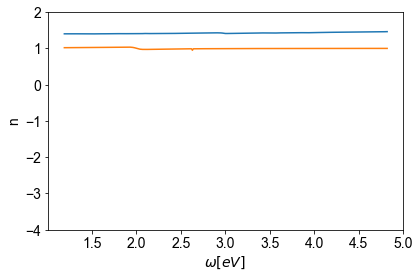

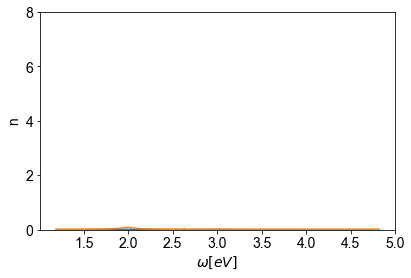

In [6]:
q=[4.72999999e-04, 9.54000000e-04, 1.72000000e-02, 9.41000000e-03,
 1.90999711e-02, 2.65000000e-05, 5.10217112e-02, 1.08927727e-01,
 1.80000000e-01, 5.95833459e-01, 7.50174482e-01, 1.23786668e-04,
 2.00017311e+00, 2.00001008e+00, 2.00000000e+00, 2.00000000e+00,
 2.00001229e+00, 2.62993606e+00]

ev_min=0.001
ev_max=10000
npoints=1000
eV_c = np.logspace(np.log10(ev_min), np.log10(ev_max), npoints)

eps_v = func2(eV,q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7],q[8],q[9],q[10],q[11],q[12],q[13],q[14],q[15],q[16],q[17])

file2 = np.loadtxt('sangre.txt')
eV=file2[:,0]
n_JC=file2[:,1] + 1j*file2[:,2]
n=((file2[:,1]+1j*file2[:,2])**.5).real
k=((file2[:,1]+1j*file2[:,2])**.5).imag


er_fit=eps_v.real
ei_fit=eps_v.imag
er_exp=((n + 1j*k)**2).real
er_exp=((n + 1j*k)**2).imag


plt.rc('font', family='Arial', size='14')
fig = plt.figure(figsize=(14,4))
ax = fig.add_subplot(121)
ax.plot(eV, ((n + 1j*k)**2).real, label="JC")
ax.plot(eV, er_fit, label="Fit")
#plt.xlabel(r'wavelength [$\mu m$] ')
plt.xlabel(r'$\omega [eV]$ ')
plt.ylabel('n')
plt.ylim(-4, 2)

plt.rc('font', family='Arial', size='14')
fig = plt.figure(figsize=(14,4))
ax = fig.add_subplot(121)
ax.plot(eV, ((n + 1j*k)**2).imag, label="JC")
ax.plot(eV, ei_fit, label="Fit")
#plt.xlabel(r'wavelength [$\mu m$] ')
plt.xlabel(r'$\omega [eV]$ ')
plt.ylabel('n')
plt.ylim(0, 8)
